Em uma regressão linear, buscamos uma reta que tente a alcançar a maior parte dos pontos enquanto na regressão logística será trassado uma curva em S.Na regressão linear a variável dependente é uma variável continua enquanto na regressão logística será uma variável categoria podendo assumir um conjunto de dados limitados de possibilidades = (0,1) (bom, regular ou ruim) (sucesso,fracasso)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
base = pd.read_csv('../../dataset/Eleicao.csv', sep=';')

In [3]:
base.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


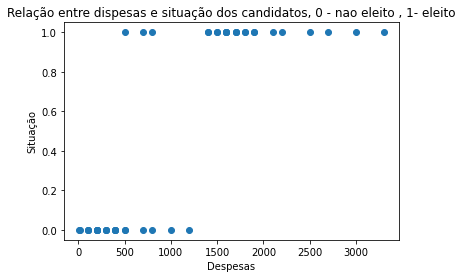

In [12]:
plt.title('Relação entre dispesas e situação dos candidatos, 0 - nao eleito , 1- eleito')
plt.xlabel('Despesas')
plt.ylabel('Situação')
plt.scatter(base.DESPESAS, base.SITUACAO)

In [20]:
np.corrcoef(base.DESPESAS, base.SITUACAO) # correlação forte positiva

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [21]:
x = base.iloc[:,2].values

In [26]:
#x = x[:,np.newaxis]
x = x.reshape(-1,1)

In [27]:
y = base.iloc[:,1].values

In [28]:
modelo = LogisticRegression()

In [29]:
modelo.fit(x,y)

LogisticRegression()

In [31]:
base_prev = pd.read_csv('../../dataset/NovosCandidatos.csv', sep=';')

In [32]:
base_prev.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


In [33]:
despesas = base_prev.iloc[:,1].values

In [34]:
despesas = despesas.reshape(-1,1)

In [35]:
previsoes = modelo.predict(despesas)

In [36]:
base_prev = np.column_stack((base_prev,previsoes)) # concatena

In [37]:
base_prev

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)

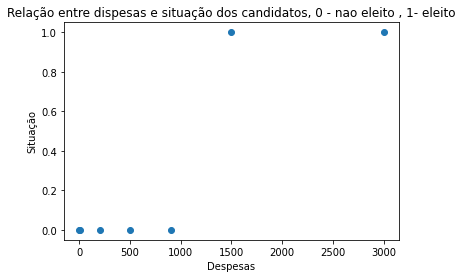

In [40]:
plt.title('Relação entre dispesas e situação dos candidatos, 0 - nao eleito , 1- eleito')
plt.xlabel('Despesas')
plt.ylabel('Situação')
plt.scatter(x=despesas,y=previsoes)